<div >
    <h1>Machine Learning</h1>
<h2>Decision tree </h2>
<P>
    A tree will be built using the data in the excel file, from which overfit and pruning will be handled
    </P>
<p>
    Here are some libraries needed to build the tree:
    </p>
</div>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import  accuracy_score

<div>
<p>Here pandas was used to take data from the file:
</p>

</div>

In [41]:
df = pd.read_csv("heart.csv", header=None)

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div>
<p>Here the numbers have been replaced by names</p>

</div>

In [43]:
df.columns = ['age',
              'sex',
              'cp',
              'trestbps',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'target'
              
    
]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<div>
<p>The last column has been dropped and given the name X and will be used as an example in the next cell and take (target ) in Y</p>


</div>

In [44]:
X = df.drop('target',axis =1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [45]:
Y = df['target']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

<div  >
<p> here we but more  dummies for <b>thal,slope,restecg and cp</b>. It converts categorical data into dummy or indicator variables.</p>

</div>

In [46]:
X_en = pd.get_dummies(X, columns=['cp',
                                 'restecg',
                                 'slope',
                                 'thal'])
X_en.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


<div  >
<p> here we define X for test and train and Y also .

</p>
<p>and tain X_tarin and Y_tain  and perdict X_train</p>

</div>

In [47]:
X_tarin , X_test , Y_train , Y_test ,=train_test_split(X_en,Y,random_state=42)


clf_df = DecisionTreeClassifier(random_state=42)
clf_df= clf_df.fit(X_tarin,Y_train)
ypred=clf_df.predict(X_tarin)

<div  >
<p>Here we note the accuracy is 1 This shows us that we have overfitting so we must deal with it</p>

</div>

In [63]:
print(accuracy_score(ypred,Y_train))

1.0


<div  >
<p>Here we drew the tree before dealing with overfitting, so we notice here that it is large .</p>

</div>

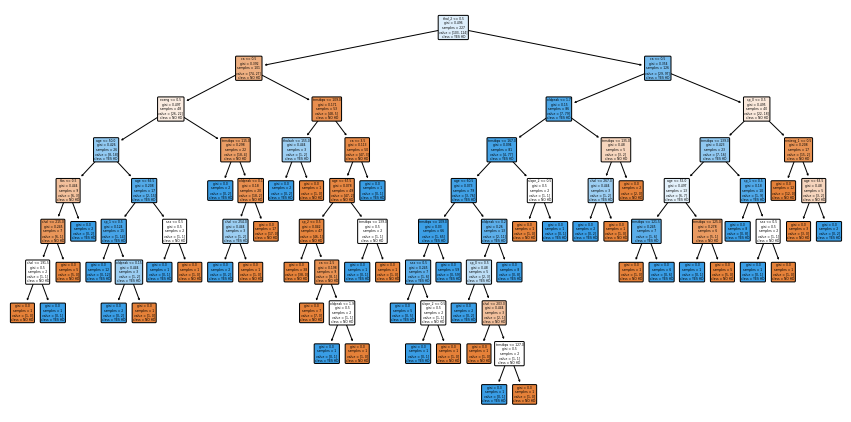

In [49]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_df,
 filled=True,
 rounded=True,
 class_names=["NO HD","YES HD"],
  feature_names= X_en.columns);

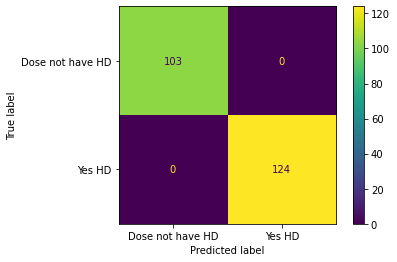

In [50]:
plot_confusion_matrix(clf_df,X_tarin,Y_train,display_labels=["Dose not have HD","Yes HD"])

In [52]:
path = clf_df.cost_complexity_pruning_path(X_tarin,Y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_df = DecisionTreeClassifier(random_state=0,min_samples_leaf=3,ccp_alpha=ccp_alpha)
    clf_df.fit(X_tarin,Y_train)
    clf_dts.append(clf_df)


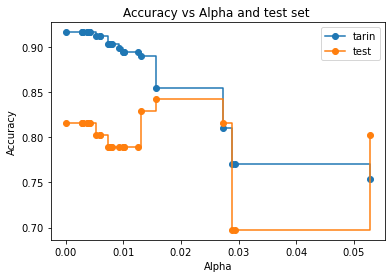

In [53]:
train_scores = [clf_df.score(X_tarin,Y_train)for clf_df in clf_dts]
test_scores = [clf_df.score(X_test,Y_test) for clf_df in clf_dts]
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha and test set ")
ax.plot(ccp_alphas,train_scores, marker= 'o',label = 'tarin',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores, marker= 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

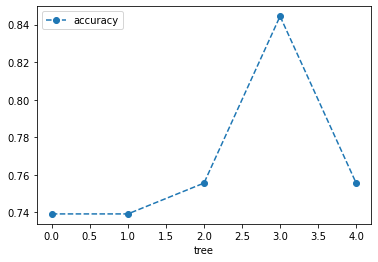

In [54]:
clf_df = DecisionTreeClassifier(random_state=42,min_samples_leaf=3,ccp_alpha=0.016)
scores =cross_val_score(clf_df,  X_tarin,  Y_train,cv=5)

df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree',y='accuracy',marker='o',linestyle='--')


<AxesSubplot:xlabel='alpha'>

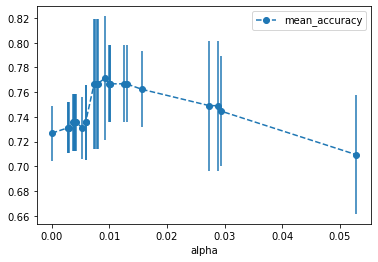

In [55]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_df =DecisionTreeClassifier(random_state=0,min_samples_leaf=3,ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_df,X_tarin,Y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
    
alpha_result = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])
alpha_result.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [56]:
alpha_result[(alpha_result['alpha']>0.014)
             &
             (alpha_result['alpha']<0.016)]

,alpha,mean_accuracy,std
23,0.015628,0.762319,0.030839


In [57]:
ideal_ccp_alpha =alpha_result[(alpha_result['alpha']>0.014)
             &
             (alpha_result['alpha']<0.016)]['alpha']
ideal_ccp_alpha

23    0.015628
Name: alpha, dtype: float64

In [58]:
ideal_ccp_alpha =float(ideal_ccp_alpha)
ideal_ccp_alpha

0.015627803137520685

In [59]:
clf_df_pruned = DecisionTreeClassifier(random_state=42,min_samples_leaf=3,ccp_alpha=ideal_ccp_alpha)
clf_df_pruned = clf_df_pruned.fit(X_tarin,
                                  Y_train)
ypred1 = clf_df_pruned.predict(X_tarin)


<div  >
<p>this is the accuracy after pruning the tree</p>

</div>

In [64]:
print(accuracy_score(ypred1,Y_train))

0.8546255506607929


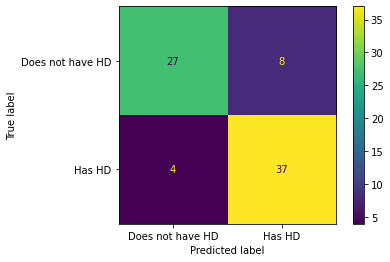

In [60]:
plot_confusion_matrix(clf_df_pruned,
                      X_test,
                      Y_test,
                      display_labels=["Does not have HD","Has HD"])

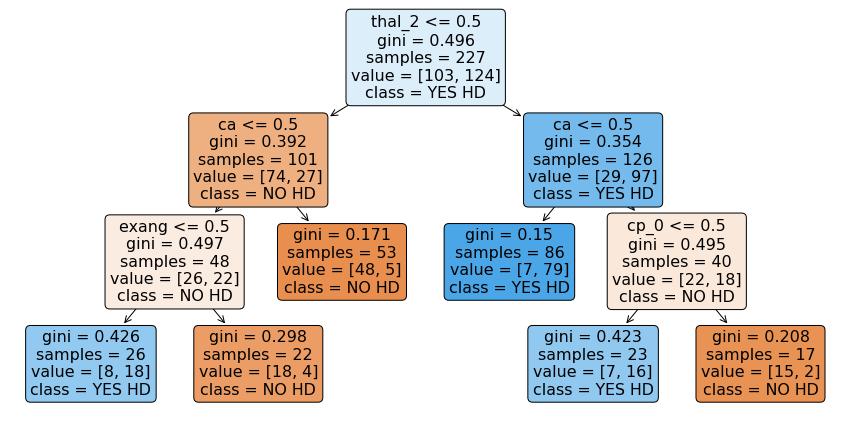

In [61]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_df_pruned,
 filled=True,
 rounded=True,
 class_names=["NO HD","YES HD"],
  feature_names= X_en.columns);
